In [110]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [4]:
doc = open("example_annotated.csv", "r")
i = 0
for line in doc:
    if i < 2:
        print line
    else: 
        break
    i = i + 1
doc.close()

"CHR	POS	REF	ALT	AC	REGION	GENE	VARIANT	AACHANGE	CADD	COSMIC	MIR	SUPERDUP	TFBS	1000G	SIFT	POLYPHEN	FATHMM	GERP	PHYLOP	ESP	METALR	EXAC	CLINVAR	AA	POLYPHEN_SCORE	SIFT_SCORE	METALR_SCORE	FATHMM_SCORE"

"1	66521	T	TATATA	2.0	in","ergenic	FAM138F,OR4F5	NA	NA	0.278	NA	NA	Score=0.994828;Name=chr19:60000	NA	NA	0	0	0	NA	NA	NA	0	NA	NA	0.0	0.0	0.0	0.0	0.0"



In [14]:
doc = open("example_annotated.csv", "r")
docop = open("annotations_cleaned.txt", "w")
for line in doc:
    line = line.replace('","', 't')
    line = line.replace('"', '')
    docop.write(line)
doc.close()
docop.close()

In [27]:
chromosomes = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "X", "Y"]
doc = open("annotations_cleaned.txt", "r")
chr_variant_counts = defaultdict(int)
for line in doc:
    if line.startswith("CHR"):
        continue
    chrN = line.split()[0]
    if chrN in chromosomes:
        chr_variant_counts[line.split()[0]] += 1
doc.close()

In [28]:
print chr_variant_counts

defaultdict(<type 'int'>, {'20': 86362, '21': 59606, '22': 52910, '1': 308490, '3': 285261, '2': 335173, '5': 256293, '4': 299454, '7': 232391, '6': 247255, '9': 166055, '8': 220569, 'Y': 717, 'X': 123665, '11': 206485, '10': 209819, '13': 155828, '12': 196717, '15': 115263, '14': 132739, '17': 108170, '16': 124259, '19': 90321, '18': 118819})


In [31]:
chr_region_stats = {}
doc = open("annotations_cleaned.txt", "r")
for line in doc:
    if line.startswith("CHR"):
        continue
    chrN = line.split()[0]
    if chrN not in chromosomes:
        continue
    region = line.split()[5]
    try:
        chr_region_stats[chrN][region] += 1
    except KeyError:
        if chrN not in chr_region_stats.keys():
            chr_region_stats[chrN] = {}
        if region not in chr_region_stats[chrN].keys():
            chr_region_stats[chrN][region] = 1
doc.close()
print chr_region_stats

{'20': {'exonic;splicing': 1, 'ncRNA_exonic': 353, 'upstream;downstream': 14, 'downstream': 770, 'splicing': 1, 'UTR5': 160, 'NA': 70, 'intergenic': 46890, 'ncRNA_UTR5': 5, 'intronic': 32472, 'ncRNA_UTR3': 43, 'exonic': 529, 'ncRNA_splicing': 2, 'UTR3': 726, 'upstream': 664, 'UTR5;UTR3': 1, 'ncRNA_intronic': 3661}, '21': {'exonic;splicing': 1, 'ncRNA_UTR5': 3, 'ncRNA_splicing': 2, 'downstream': 395, 'splicing': 2, 'UTR5': 81, 'ncRNA_exonic': 230, 'intergenic': 34002, 'upstream': 362, 'intronic': 18009, 'ncRNA_UTR3': 23, 'UTR3': 398, 'exonic': 292, 'NA': 43, 'UTR5;UTR3': 1, 'upstream;downstream': 6, 'ncRNA_intronic': 5756}, '22': {'splicing': 4, 'upstream;downstream': 44, 'downstream': 632, 'UTR5': 169, 'ncRNA_exonic': 277, 'intergenic': 24131, 'ncRNA_UTR5': 4, 'intronic': 23041, 'NA': 35, 'exonic': 483, 'ncRNA_UTR3': 23, 'ncRNA_splicing': 2, 'UTR3': 797, 'upstream': 649, 'ncRNA_intronic': 2619}, '1': {'splicing': 12, 'upstream;downstream': 77, 'downstream': 2505, 'UTR5': 628, 'ncRNA_ex

In [39]:
exonic_variants_found = {}
for key, value in chr_region_stats.items():
    exonic_variants_found[key] = value['exonic']
print exonic_variants_found

{'20': 529, '21': 292, '22': 483, '1': 2048, '3': 1199, '2': 1380, '5': 939, '4': 821, '7': 1084, '6': 887, '9': 805, '8': 696, 'Y': 2, 'X': 365, '11': 1524, '10': 827, '13': 364, '12': 1141, '15': 650, '14': 719, '17': 1175, '16': 908, '19': 1733, '18': 388}


In [47]:
exonic_variant_effects = {}
exonic_variant_types = {}
doc = open("annotations_cleaned.txt", "r")
for line in doc:
    if line.startswith("CHR"):
        continue
    chrN = line.split()[0]
    if chrN not in chromosomes:
        continue
    region = line.split()[5]
    if region not in ['exonic']:
        continue
    effect = line.split()[7]
    vtype = line.split()[8]
    try:
        exonic_variant_effects[chrN][effect] += 1
    except KeyError:
        if chrN not in exonic_variant_effects.keys():
            exonic_variant_effects[chrN] = {}
        if effect not in exonic_variant_effects[chrN].keys():
            exonic_variant_effects[chrN][effect] = 1
    try:
        exonic_variant_types[chrN][vtype] += 1
    except KeyError:
        if chrN not in exonic_variant_types.keys():
            exonic_variant_types[chrN] = {}
        if vtype not in exonic_variant_types[chrN].keys():
            exonic_variant_types[chrN][vtype] = 1
doc.close()

In [80]:
doc = open("annotations_cleaned.txt", "r")
cadd = []
pc99 = 0
for line in doc:
    if line.startswith("CHR"):
        continue
    c = line.split()[9]
    try:
        cadd.append(float(c))
        if float(c) >= 20:
            pc99 += 1 
    except ValueError:
        continue
doc.close()
print max(cadd), min(cadd), np.median(cadd), len(cadd), pc99

45.0 0.0 2.09 4020960 12936


In [84]:
chr_variant_cadd = {}
chr_known_cadd = {}
doc = open("annotations_cleaned.txt", "r")
for line in doc:
    if line.startswith("CHR"):
        continue
    chrN = line.split()[0]
    if chrN not in chromosomes:
        continue
    region = line.split()[5]
    cscore = line.split()[9]
    try:
        cscore = float(cscore)
    except ValueError:
        continue
    if cscore >= 10.0:
        try:
            chr_variant_cadd[chrN] += 1
        except KeyError:
            if chrN not in chr_variant_cadd.keys():
                chr_variant_cadd[chrN] = 1
    try:
        chr_known_cadd[chrN] += 1
    except KeyError:
        if chrN not in chr_known_cadd.keys():
            chr_known_cadd[chrN] = 1
doc.close()

In [101]:
doc = open("variant_stats2.json", "w")
#variant counts
doc.write("{")
i = 0
doc.write('"counts" : {' )
for key, value in chr_variant_counts.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write( '"' + str(key) + '"' + " : " + str(value))
doc.write("}, ")
#region stats
doc.write(' "region_counts" : {' )
i = 0
for key, value in chr_region_stats.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    if key != 'Y':
        value = {k:v for k,v in value.iteritems() if v >= 1000}
    doc.write( '"' + str(key) + '"' + " : " + str(value).replace("'", '"'))
doc.write("}, ")
#exonic variant numbers
doc.write(' "exonic_variant_counts" : {')
i = 0
for key, value in exonic_variants_found.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write(' "' + str(key) + '"' + " : " + str(value))
doc.write("}, ")
#exonic variant effects
doc.write(' "exonic_variant_effects" : {')
i = 0
for key, value in exonic_variant_effects.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write(' "' + str(key) + '"' + " : " + str(value).replace("'", '"'))
doc.write("}, ")
#exonic variant types
doc.write(' "exonic_variant_types" : {')
i = 0
for key, value in exonic_variant_types.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    value = {k:v for k,v in value.iteritems() if v > 1}
    doc.write(' "' + str(key) + '"' + " : " + str(value).replace("'", '"'))
doc.write("}, ")
#top 10% cadd score counts
doc.write(' "high_cadd_counts" : {')
i = 0
for key, value in chr_variant_cadd.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write( '"' + str(key) + '"' + " : " + str(value))
doc.write("}, ")
#known cadd scores
doc.write(' "known_cadd_counts" : {')
i = 0
for key, value in chr_known_cadd.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write('"' + str(key) + '"' + " : " + str(value))
doc.write("}, ")
#clinvar max
doc.write(' "clinvar_max_counts" : {')
i = 0
for key, value in clinvar_max_count.items():
    if i != 0:
        doc.write(", ")
    i = i + 1
    doc.write('"' + str(key) + '"' + " : " + str(value))
doc.write("}, ")
doc.write(' "clinvar_max_total" : ' + str(sum(clinvar_max_count.values())))
doc.write("}")
doc.close()

In [90]:
doc = open("annotations_cleaned.txt", "r")
cvar_c = []
clinvar_max_count = {}
for line in doc:
    cvar = line.split()[23]
    if cvar.startswith("CLIN"):
        continue
    chrN = line.split()[0]
    try:
        cvar = float(cvar)
    except ValueError:
        continue
    if cvar == 1.0:
        try:
            clinvar_max_count[chrN] += 1
        except KeyError:
            clinvar_max_count[chrN] = 1
doc.close()
print clinvar_max_count, sum(clinvar_max_count.values())

{'20': 9, '21': 13, '22': 10, '1': 24, '3': 6, '2': 11, '5': 9, '4': 6, '7': 6, '6': 8, '9': 6, '8': 1, 'X': 14, '11': 22, '10': 3, '13': 3, '12': 5, '15': 8, '14': 5, '17': 15, '16': 10, '19': 22, '18': 3} 219


In [85]:
print chr_variant_cadd, chr_known_cadd

{'20': 4423, '21': 1961, '22': 1965, '1': 17848, '3': 15577, '2': 18907, '5': 13294, '4': 12450, '7': 11515, '6': 12985, '9': 9712, '8': 9204, 'Y': 26, 'X': 5080, '11': 10916, '10': 10230, '13': 7309, '12': 9609, '15': 6451, '14': 7389, '17': 5692, '16': 5733, '19': 2756, '18': 5622} {'20': 83975, '21': 57939, '22': 51200, '1': 299536, '3': 278070, '2': 326550, '5': 250176, '4': 292646, '7': 225929, '6': 241106, '9': 161445, '8': 215412, 'Y': 403, 'X': 120311, '11': 200842, '10': 204404, '13': 151914, '12': 191069, '15': 111960, '14': 129100, '17': 104372, '16': 120530, '19': 86216, '18': 115855}


In [91]:
clinvar_max_count["Y"] = 0

In [117]:
doc = open("annotations_cleaned.txt", "r")
chromosomes = []
positions = []
genes = []
effects = []
for line in doc:
    cvar = line.split()[23]
    if cvar.startswith("CLIN"):
        continue
    chrN = line.split()[0]
    try:
        cvar = float(cvar)
    except ValueError:
        continue
    if cvar == 1.0:
        chromosomes.append(chrN)
        positions.append(int(line.split()[1]))
        genes.append(line.split()[6])
        effects.append(line.split()[7])
doc.close()
print clinvar_max_count, sum(clinvar_max_count.values())

{'20': 9, '21': 13, '22': 10, '1': 24, '3': 6, '2': 11, '5': 9, '4': 6, '7': 6, '6': 8, '9': 6, '8': 1, 'Y': 0, 'X': 14, '11': 22, '10': 3, '13': 3, '12': 5, '15': 8, '14': 5, '17': 15, '16': 10, '19': 22, '18': 3} 219


In [108]:
print genes

['C1orf86', 'SRM', 'TNFRSF8', 'PRAMEF1', 'ARHGEF10L', 'ZBTB8A', 'CAP1', 'CAP1', 'CAP1', 'CAP1', 'CAP1', 'CAP1', 'P3H1', 'TAL1', 'FOXD2', 'DMRTA2', 'C1orf177', 'ROR1', 'DCAF6', 'PPFIA4', 'EIF2D', 'TLR5', 'OBSCN', 'TFB2M', 'KIF3C', 'BIRC6', 'RMDN2', 'AAK1', 'AFF3', 'SOWAHC', 'MDH1B', 'FN1', 'FN1', 'IGFBP2', 'DNPEP', 'XPC', 'SCN10A', 'MST1R', 'ARHGAP31', 'ACAD11', 'MFN1', 'CFAP99', 'DOK7', 'UGT2A1', 'HELQ', 'DDX60L', 'TENM3', 'PDE8B', 'DCP2', 'SEMA6A', 'SOWAHA', 'PCDHB6', 'PCDHGB3', 'SLC6A7', 'CYFIP2', 'HMMR', 'PPP1R3G', 'PPP1R3G', 'HIVEP1', 'LAMA4', 'LAMA4', 'CTGF', 'CTGF', 'CTGF', 'HOXA4', 'ABCA13', 'SRRM3', 'SSPO', 'AOC1', 'AOC1', 'NUDT18', 'MPDZ', 'FOCAD', 'FRRS1L', 'FRRS1L', 'GPSM1', 'PNPLA7', 'CUBN', 'HACD1', 'CPEB3', 'IFITM1', 'ANO9', 'DUSP8', 'BBOX1', 'LGR4', 'PEX16', 'OR5B12', 'ZP1', 'AHNAK', 'RARRES3', 'EHD1', 'PCNXL3', 'RHOD', 'SUV420H1', 'NADSYN1', 'SLCO2B1', 'LRRC32', 'KIAA1377', 'ATM', 'NCAM1', 'NCAM1', 'SNX19', 'ARHGDIB', 'AVIL', 'TMTC3', 'CUX2', 'UBC', 'FREM2', 'FREM2', 'C

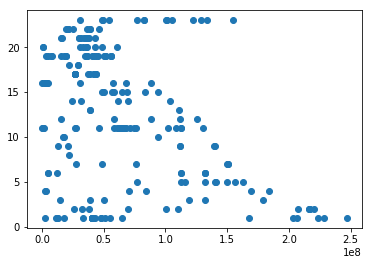

In [118]:
gene_x = [i for i in range(219)]
chrs = [23 if x == 'X' else int(x) for x in chromosomes ]
plt.scatter(positions, chrs)
plt.show()

In [119]:
print positions

[2126139, 11119899, 12175729, 12855835, 17991052, 33065947, 40533266, 40533287, 40533315, 40533320, 40533326, 40533347, 43212431, 47685455, 47904909, 50884778, 55277599, 64608329, 167906239, 203008174, 206773659, 223283910, 228444565, 246720798, 26203678, 32667182, 38179134, 69741854, 100343557, 110372192, 207621759, 216235089, 216272900, 217498290, 220250147, 14197987, 38739574, 49928691, 119118104, 132360883, 179096508, 2461888, 3475252, 70513139, 84376743, 169336662, 183652175, 76704849, 112312676, 115813726, 132150948, 140531175, 140750044, 149585025, 156721863, 162890953, 5086070, 5086211, 12122645, 112508769, 112508770, 132271952, 132271959, 132271980, 27169934, 48545976, 75914934, 149506211, 150556055, 150556056, 21966700, 13112116, 20866974, 111929420, 111929421, 139222174, 140374861, 16943371, 17659131, 93841227, 314207, 433387, 1578090, 27077118, 27390089, 45937267, 58207204, 60638470, 62292882, 63313644, 64621856, 65383896, 66837965, 67957518, 71184678, 74904362, 76370792, 1

In [134]:
doc = open("possible_pathogens.json", "w")
doc.write("{")
doc.write(' "chromosomes" : ' + str(chrs))
doc.write(', "positions" : ' + str(positions))
doc.write(', "genes" : ' + str(genes).replace("'",'"'))
doc.write(', "sizes" : ' + str(sizes))
doc.write("}")
doc.close()

In [121]:
print min(positions), max(positions)

103517 246720798


In [122]:
gene_count = defaultdict(int)
for gene in genes:
    gene_count[gene] += 1
print gene_count

defaultdict(<type 'int'>, {'AOC1': 2, 'SSPO': 1, 'HECTD1': 1, 'SLC6A7': 1, 'EVI5L': 1, 'CAP1': 6, 'FRRS1L': 2, 'PCK2': 1, 'POLR3K': 1, 'AXL': 1, 'PPP1R3G': 2, 'CCDC102A': 1, 'TBC1D17': 1, 'ZP1': 1, 'MPP2': 2, 'TFB2M': 1, 'FMNL1': 2, 'N6AMT1': 2, 'C1orf86': 1, 'ROR1': 1, 'P3H1': 1, 'PNPLA7': 1, 'GJD3': 1, 'VSIG10L': 1, 'IFITM1': 1, 'GCOM1,MYZAP': 1, 'PYY': 1, 'XPC': 1, 'UGT2A1': 1, 'KIRREL2': 1, 'PDE8B': 1, 'MAGIX': 1, 'PCDHGB3': 1, 'FN1': 2, 'EIF2D': 1, 'MST1R': 1, 'ADCY9': 1, 'TCF15': 2, 'FREM2': 2, 'TAB3': 1, 'TLR5': 1, 'LGR4': 1, 'RFX7': 1, 'HELQ': 1, 'ANO9': 1, 'BBOX1': 1, 'GRIA3': 1, 'SPECC1L': 1, 'BCORL1': 1, 'GLYR1': 1, 'ZNF598': 3, 'ATP7A': 1, 'ARHGEF10L': 1, 'DPEP2': 1, 'SDHAF1': 1, 'PCNXL3': 1, 'SOWAHA': 1, 'ASXL1': 1, 'AHNAK': 1, 'ATP8B4': 1, 'AFF3': 1, 'ZBTB8A': 1, 'SOWAHC': 1, 'TNFRSF8': 1, 'FOCAD': 1, 'DDX60L': 1, 'MPDZ': 1, 'HMMR': 1, 'SARM1': 8, 'SMC1B': 1, 'UBC': 1, 'RNF40': 1, 'IGFBP2': 1, 'CUX2': 1, 'COL4A1': 1, 'PRDM15': 1, 'SBK3': 1, 'SUV420H1': 1, 'RHOD': 1, 'HACD

In [132]:
sizes = [gene_count[x] for x in genes]
print sizes

[1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1]


In [133]:
sizes = list(map(lambda x: x * 100, sizes))
print sizes

[100, 100, 100, 100, 100, 100, 600, 600, 600, 600, 600, 600, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 100, 200, 200, 300, 300, 300, 100, 100, 100, 100, 200, 200, 100, 100, 100, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 100, 100, 100, 100, 100, 100, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 300, 300, 300, 100, 100, 100, 100, 100, 100, 800, 800, 800, 800, 800, 800, 800, 800, 100, 100, 200, 200, 100, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 200, 100, 100, 100, 200, 200, 200, 200, 100, 100, 100, 300, 300, 300, 100,

In [138]:
gene_count['AIFM3']

1